In [1]:
!pip install pandas

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('toxic-train.csv')

In [4]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
###КОД ИЗ СЕМИНАРСКОЙ ТЕТРАДКИ
from tensorflow.keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [6]:
!pip install sklearn
!pip install matplotlib

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import re

In [8]:
def preprocessing(text): ###Будем использовать слова и знаки препинания
    return re.findall('[a-zA-Z]+|[\.\?!,—]', text)

In [9]:
data['tokens'] = data['comment_text'].apply(preprocessing)

In [10]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[Explanation, Why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[D, aww, !, He, matches, this, background, col..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[Hey, man, ,, I, m, really, not, trying, to, e..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[More, I, can, t, make, any, real, suggestions..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[You, ,, sir, ,, are, my, hero, ., Any, chance..."
...,...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0,"[Jerome, ,, I, see, you, never, got, around, t..."
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0,"[Lucky, bastard, http, wikimediafoundation, .,..."
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0,"[shame, on, you, all, !, !, !, You, want, to, ..."
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0,"[MEL, GIBSON, IS, A, NAZI, BITCH, WHO, MAKES, ..."


In [124]:
texts = data['tokens']
y = data['toxic']

Отделим немного данных на тестирование в конце

In [125]:
text_chosen, text_other, y_chosen, y_other = train_test_split(texts, y, test_size=0.05, stratify=y, random_state = 0)

In [126]:
X = text_chosen
y = y_chosen

In [127]:
y = y_chosen

In [128]:
len(X)

212371

In [129]:
len(y)

212371

In [130]:
from collections import Counter

In [131]:
vocab = Counter()

for text in text_chosen:
    vocab.update(text)

In [132]:
len(vocab)

273170

In [133]:
filtered_vocab = set([token for token in vocab if vocab[token] > 5])

In [134]:
len(filtered_vocab)

53376

In [135]:
token2id = {'UNK':1, 'PAD':0}

for token in filtered_vocab:
    token2id[token] = len(token2id)
    
id2token = {i:token for token, i in token2id.items()}

In [136]:
def text2ids(text):
    ids = []
    for token in text:
        try:
            ids.append(token2id[token])
        except KeyError:
            ids.append(1)
    return ids

In [137]:
X_id = [text2ids(tokens) for tokens in X]

In [138]:
MAX_LEN = max([len(tokens) for tokens in X])
MAX_LEN

4948

In [139]:
import numpy as np

In [140]:
np.median([len(tokens) for tokens in X])

40.0

In [141]:
MAX_LEN = 100

In [28]:
X[:10]

66805     [This, won, t, by, itself, be, more, o, a, pre...
140941    [The, matrices, are, correct, but, not, the, m...
155431    [You, do, not, own, a, page, because, it, happ...
31074     [Hi, again, You, might, want, to, read, this, ...
182566    [In, the, era, of, YouTube, ,, people, who, mi...
94934     [With, all, due, respect, ,, the, criticism, s...
194833    [Please, know, that, Wikipedia, is, not, a, me...
149411    [Doh, !, Read, it, wrong, ., Never, mind, ., d...
52652     [e, c, Thanks, for, the, offer, Tom, ,, I, did...
144379    [Uncle, douggie, sound, like, a, shirt, lifter...
Name: tokens, dtype: object

In [142]:
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X_id, maxlen=MAX_LEN)

In [143]:
type(X_pad)

numpy.ndarray

In [32]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pad, y_chosen, test_size=0.05, stratify=y)

In [146]:
roc_ouc = tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC', summation_method='interpolation', name=None,
    dtype=None, thresholds=None, multi_label=False, label_weights=None
)

In [147]:
                     # ModelCheckpoint сохраняет лучшие версии моделей
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.weights', # названия файла 
                                                monitor='val_f1', # за какой метрикой следить
                                                verbose=1, # будет печатать что происходит
                                                save_weights_only=True, # если нужно только веса сохранить
                                                save_best_only=True, # сохранять только лучшие
                                                mode='max', # если метрика должна расти, то тут max и min если наоборот
                                                save_freq='epoch' # как часто вызывать
                                               )

# EarlyStopping позволяет автоматически остановить обучение, если качество не улучшается 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_f1', 
                                              min_delta=0.01, # какая разница считается как улучшение
                                              patience=3, # сколько эпох терпеть отсутствие улучшений
                                              verbose=1, 
                                              mode='max'
                                              )                   

In [148]:
inputs = tf.keras.layers.Input(shape=(int(MAX_LEN),))
embeddings = tf.keras.layers.Embedding(input_dim=len(token2id), output_dim=500)(inputs)

drop1 = tf.keras.layers.Dropout(0.2)(embeddings)
conv1 = tf.keras.layers.Conv1D(kernel_size=3, filters=32, padding='same', strides=1)(drop1)
pool1 = pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv1)
conv2 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(pool1)
pool2 = pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv2)
conv3 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(pool2)
pool3 = tf.compat.v1.keras.layers.MaxPool1D()(conv3)

flatten = tf.keras.layers.Flatten()(pool3)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1, roc_ouc])

In [149]:
model.fit(X_train, y_train, 
         validation_data=(X_valid, y_valid),
         epochs=50,
         batch_size=2000,
         callbacks=[checkpoint, early_stop])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 0.2661 - f1: 0.2224 - auc_3: 0.7867
Epoch 00001: val_f1 improved from -inf to 0.58268, saving model to model.weights
101/101 [==============================] - 65s 645ms/step - loss: 0.2661 - f1: 0.2224 - auc_3: 0.7867 - val_loss: 0.1669 - val_f1: 0.5827 - val_auc_3: 0.9315
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 0.1286 - f1: 0.7063 - auc_3: 0.9618
Epoch 00002: val_f1 improved from 0.58268 to 0.72594, saving model to model.weights
101/101 [==============================] - 64s 636ms/step - loss: 0.1286 - f1: 0.7063 - auc_3: 0.9618 - val_loss: 0.1333 - val_f1: 0.7259 - val_auc_3: 0.9584
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 0.0906 - f1: 0.8096 - auc_3: 0.9822
Epoch 00003: val_f1 did not improve from 0.72594
101/101 [==============================] - 63s 619ms/step - loss: 0.0906 - f1: 0.8096 - auc_3: 0.9822 - val_loss: 0.1379 - val_f1: 0.7113 - val_auc_3: 0

In [120]:
model.save_weights('rocout_toxic_model.weights')

dict_keys(['loss', 'f1', 'val_loss', 'val_f1'])


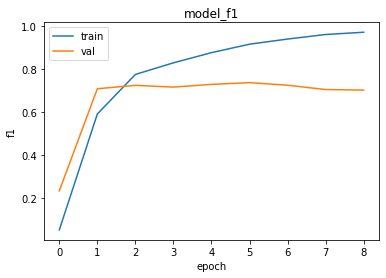

In [121]:
print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model_f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Уменьшим количество пулингов

In [153]:
inputs = tf.keras.layers.Input(shape=(int(MAX_LEN),))
embeddings = tf.keras.layers.Embedding(input_dim=len(token2id), output_dim=500)(inputs)

drop1 = tf.keras.layers.Dropout(0.2)(embeddings)
conv1 = tf.keras.layers.Conv1D(kernel_size=3, filters=32, padding='same', strides=1)(drop1)
conv2 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(conv1)
pool2 = pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv2)
conv3 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(pool2)
pool3 = tf.compat.v1.keras.layers.MaxPool1D()(conv3)

flatten = tf.keras.layers.Flatten()(pool3)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1, roc_ouc])

In [154]:
model.fit(X_train, y_train, 
         validation_data=(X_valid, y_valid),
         epochs=50,
         batch_size=2000,
         callbacks=[checkpoint, early_stop])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 0.2458 - f1: 0.2827 - auc_3: 0.8270
Epoch 00001: val_f1 did not improve from 0.72594
101/101 [==============================] - 66s 649ms/step - loss: 0.2458 - f1: 0.2827 - auc_3: 0.8270 - val_loss: 0.1490 - val_f1: 0.6500 - val_auc_3: 0.9462
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 0.1166 - f1: 0.7430 - auc_3: 0.9690
Epoch 00002: val_f1 did not improve from 0.72594
101/101 [==============================] - 64s 638ms/step - loss: 0.1166 - f1: 0.7430 - auc_3: 0.9690 - val_loss: 0.1293 - val_f1: 0.7202 - val_auc_3: 0.9603
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 0.0866 - f1: 0.8158 - auc_3: 0.9840
Epoch 00003: val_f1 did not improve from 0.72594
101/101 [==============================] - 65s 643ms/step - loss: 0.0866 - f1: 0.8158 - auc_3: 0.9840 - val_loss: 0.1369 - val_f1: 0.7244 - val_auc_3: 0.9528
Epoch 4/50
101/101 [==============================] - ETA: 0s

dict_keys(['loss', 'f1', 'auc_3', 'val_loss', 'val_f1', 'val_auc_3'])


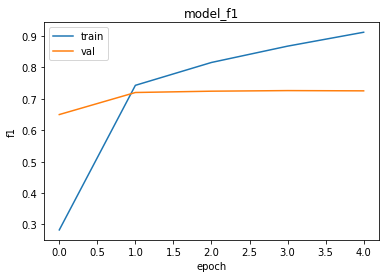

In [155]:
print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model_f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Добавим ещё дропаутов

In [156]:
inputs = tf.keras.layers.Input(shape=(int(MAX_LEN),))
embeddings = tf.keras.layers.Embedding(input_dim=len(token2id), output_dim=500)(inputs)

drop1 = tf.keras.layers.Dropout(0.1)(embeddings)
conv1 = tf.keras.layers.Conv1D(kernel_size=3, filters=32, padding='same', strides=1)(drop1)
drop2 = tf.keras.layers.Dropout(0.05)(conv1)
conv2 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(drop2)
pool2 = pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv2)
conv3 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(pool2)
pool3 = tf.compat.v1.keras.layers.MaxPool1D()(conv3)
drop3 = tf.keras.layers.Dropout(0.1)(pool3)

flatten = tf.keras.layers.Flatten()(pool3)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1, roc_ouc])

In [157]:
model.fit(X_train, y_train, 
         validation_data=(X_valid, y_valid),
         epochs=50,
         batch_size=2000,
         callbacks=[checkpoint, early_stop])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 0.2726 - f1: 0.2418 - auc_3: 0.7888
Epoch 00001: val_f1 did not improve from 0.72627
101/101 [==============================] - 71s 701ms/step - loss: 0.2726 - f1: 0.2418 - auc_3: 0.7888 - val_loss: 0.1537 - val_f1: 0.6310 - val_auc_3: 0.9414
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 0.1179 - f1: 0.7392 - auc_3: 0.9683
Epoch 00002: val_f1 improved from 0.72627 to 0.74288, saving model to model.weights
101/101 [==============================] - 67s 667ms/step - loss: 0.1179 - f1: 0.7392 - auc_3: 0.9683 - val_loss: 0.1296 - val_f1: 0.7429 - val_auc_3: 0.9617
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 0.0879 - f1: 0.8146 - auc_3: 0.9834
Epoch 00003: val_f1 did not improve from 0.74288
101/101 [==============================] - 68s 673ms/step - loss: 0.0879 - f1: 0.8146 - auc_3: 0.9834 - val_loss: 0.1316 - val_f1: 0.7357 - val_auc_3: 0.9590
Epoch 4/50
101/101 [======

dict_keys(['loss', 'f1', 'auc_3', 'val_loss', 'val_f1', 'val_auc_3'])


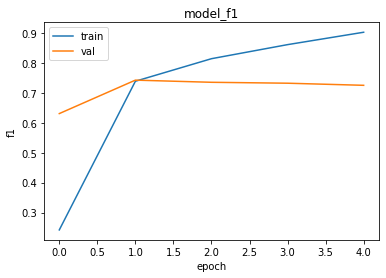

In [158]:
print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model_f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
Графики везде показывают f1, roc к концу даже падает по мере увеличения f1

In [ ]:
Поменяем конфигурацию сети 

In [161]:

inputs = tf.keras.layers.Input(shape=(int(MAX_LEN),))
embeddings = tf.keras.layers.Embedding(input_dim=len(token2id), output_dim=100)(inputs)
convs = []

drop1 = tf.keras.layers.Dropout(0.2)(embeddings)
conv1 = tf.keras.layers.Conv1D(kernel_size=3, filters=32, padding='same', strides=1)(drop1)
conv2 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(conv1)
conv3 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(conv2)
conv4 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(conv3)
pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv4)
convs.append(pool1)

drop2 = tf.keras.layers.Dropout(0.1)(embeddings)
conv5 =  tf.keras.layers.Conv1D(kernel_size=10, filters=5, padding='same', strides=1)(drop2)
pool2 = tf.compat.v1.keras.layers.MaxPool1D()(conv5)
convs.append(pool2)

drop3 = tf.keras.layers.Dropout(0.1)(embeddings)
conv6 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(drop3)
conv7 = tf.keras.layers.Conv1D(kernel_size=4, filters=5, padding='same', strides=1)(conv6)
pool3 = tf.compat.v1.keras.layers.MaxPool1D()(conv7)
convs.append(pool3)

drop4 = tf.keras.layers.Dropout(0.2)(embeddings)
conv8 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(drop4)
pool4 = tf.compat.v1.keras.layers.MaxPool1D()(conv8)
convs.append(pool4)

concat = tf.keras.layers.concatenate(convs, axis=1)
conv_global = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=1)(concat)
flatten = tf.keras.layers.Flatten()(conv_global)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1, roc_ouc])

In [162]:
model.fit(X_train, y_train, 
         validation_data=(X_valid, y_valid),
         epochs=50,
         batch_size=2000,
         callbacks=[checkpoint, early_stop])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 0.2186 - f1: 0.3612 - auc_3: 0.8738
Epoch 00001: val_f1 did not improve from 0.74288
101/101 [==============================] - 20s 198ms/step - loss: 0.2186 - f1: 0.3612 - auc_3: 0.8738 - val_loss: 0.1504 - val_f1: 0.7159 - val_auc_3: 0.9506
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 0.1059 - f1: 0.7715 - auc_3: 0.9754
Epoch 00002: val_f1 did not improve from 0.74288
101/101 [==============================] - 18s 180ms/step - loss: 0.1059 - f1: 0.7715 - auc_3: 0.9754 - val_loss: 0.1450 - val_f1: 0.7312 - val_auc_3: 0.9579
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 0.0748 - f1: 0.8433 - auc_3: 0.9882
Epoch 00003: val_f1 did not improve from 0.74288
101/101 [==============================] - 18s 181ms/step - loss: 0.0748 - f1: 0.8433 - auc_3: 0.9882 - val_loss: 0.1511 - val_f1: 0.7207 - val_auc_3: 0.9511
Epoch 4/50
101/101 [==============================] - ETA: 0s

dict_keys(['loss', 'f1', 'auc_3', 'val_loss', 'val_f1', 'val_auc_3'])


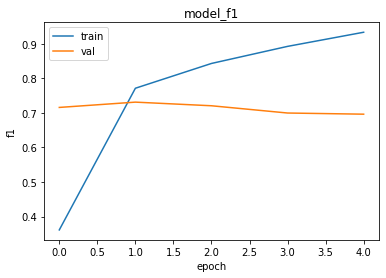

In [164]:
print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model_f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Качество очень быстро перестаёт повышаться, дропауты не спасают от переобучения